# PHYS 404- Spring 2020
# Homework Lect-20 
# Gravitational Wave Chirp

## Brief

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)

[LIGO Gravitational Wave Chirp](https://www.ligo.caltech.edu/video/ligo20160211v2)


C:\Users\ras42\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


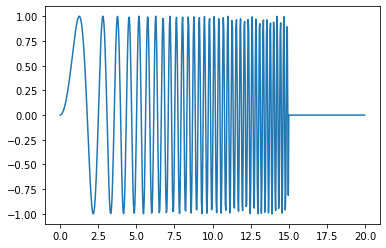

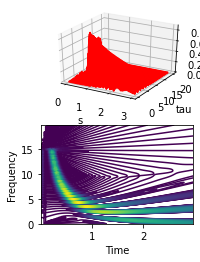

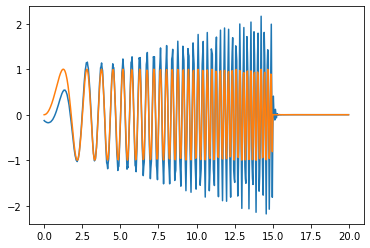

In [1]:
# The same task but only use the imagninary part of the wavelet 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p  
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=20./nt
tar=arange(0.,20.,dtstep)

def func(t):
    return func2(t)

def func2(t):
    y=0.
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    return y

def func1(t):
    return(sin(2.*pi*t))

def grav(t):
    if (t>0 and t<15):
        y = sin(t*t)
    else:
        y = 0
    return y

def morlet(t,sigma):
#    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

# Mexican hat wavelet
def mexhatlet(t):
    sig=1.
    y=(1-t*t/sig/sig)*exp(-t*t/sig/sig/2.)
    return y

# sin wavelet within a time interval
def sinlet(t):
    if(abs(t)<10.*pi/5.):
        return sin(5.*t)
    else:
        return 0

# gaussian function
def gausslet(t):
    y = exp(-t*t/2.)
    return y


def wavelet():     
    for idext in range(nt):
        yarr[idext]=grav(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1))*yarr)*dtstep
yarr=zeros(nt)
wavelet()

 
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
p.xlabel('Time')
p.ylabel('Frequency')
p.show()
p.show()  

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.real*2.2)
p.plot(tar,yarr)
p.show()